#### COMP3602: Data Analysis and Visualization with Python, Spring 2024

# Project Part 3

Source URL of Dataset: [https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks)

**Group Members:**

- Abdulaziz Saud Al Jabri (134563)

- Mazin Humood Al Dhuhli (134362)


---

Predictive Modeling and Evaluation of a dataset is a crucial step in the data analysis process. It helps to understand the data better and make predictions based on the data. This project part will focus on building a predictive model for the cyber attacks dataset. After that we will use Hyper-parameter tuning to improve the model performance. Finally, we will evaluate the model using different evaluation metrics.

---

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score,recall_score

In [3]:
data = pd.read_csv('cybersecurity_attacks.csv')
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


--- 

Pre-Processing

In [4]:
# Fill Missing Data
df = pd.DataFrame(data)
df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_clean.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Alert Data,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",39.123.165.122,Log Data,Alert Data,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",39.123.165.122,Log Data,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,Log Data,Alert Data,Firewall


In [5]:
# Encode from Categorical to Numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_clean_encoded = df_clean.apply(lambda x: labelencoder.fit_transform(x) if x.dtype == 'object' else x)
df_clean_encoded.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,36141,939,37091,31225,17616,0,503,1,2,29502,...,2,1,22830,18202,0,3723,5143,0,0,1
1,6759,35826,33418,17245,48166,0,1174,1,2,2600,...,0,1,27434,18188,1,1677,14070,0,0,0
2,30425,32917,19496,16811,53600,2,306,0,2,26898,...,1,1,10139,18280,2,1707,1568,0,0,0
3,37100,12598,592,20018,32534,2,385,1,2,36619,...,0,2,9216,4793,1,3750,14070,0,0,0
4,37488,34515,17716,6131,26646,1,1462,1,0,25546,...,0,1,6462,17964,2,577,4967,0,0,0


---

Task 1.

a. Knn Classification

In [6]:
x = df_clean_encoded[['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source', 'Attack Signature']]

y = df_clean_encoded['Attack Type']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.25)

Knn = KNeighborsClassifier(n_neighbors=9)

Knn.fit(xtrain, ytrain)

ypred = Knn.predict(xtest)

print("Accuracy: ", accuracy_score(ytest, ypred))

Accuracy:  0.3299


b. Decision Tree Classification

Accuracy: 0.3268


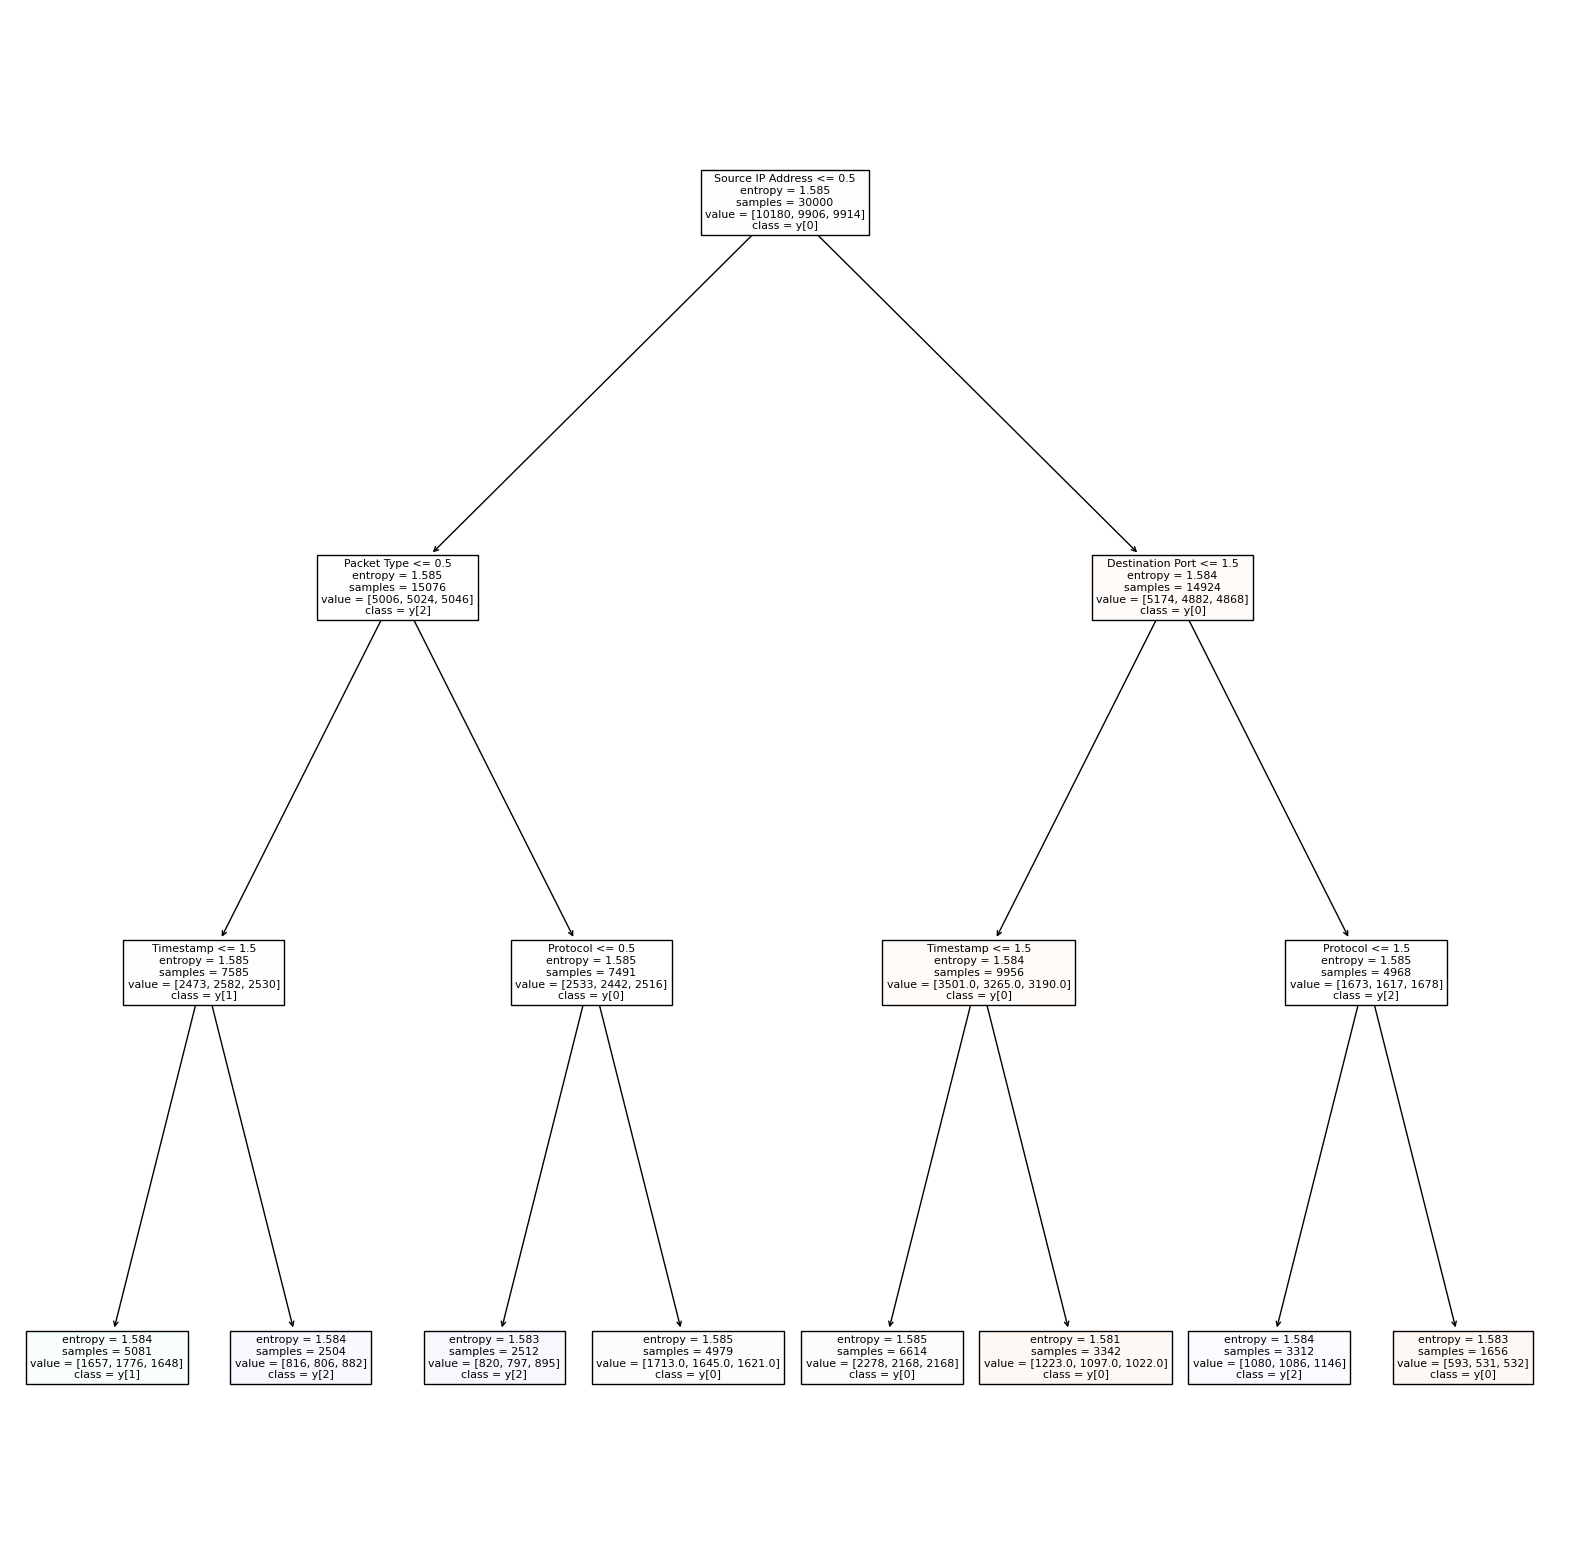

In [7]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)

x = df_clean_encoded[['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source', 'Attack Signature']]

y = df_clean_encoded['Attack Type']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

classifier.fit(xtrain, ytrain)

ypred = classifier.predict(xtest)

print("Accuracy:", accuracy_score(ytest, ypred))

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 20))
plot_tree(classifier, filled=True, feature_names=data.columns[:-1], class_names=True)
plt.show()

---

Task 2.

Hyper-parameter tuning

In [33]:
# Knn
dd = {}
x = df_clean_encoded[['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source', 'Attack Signature']]

y = df_clean_encoded['Attack Type']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.25)

Knn = KNeighborsClassifier(n_neighbors=9)

Knn.fit(xtrain, ytrain)

ypred1 = Knn.predict(xtest)

print("Accuracy for k = 9: ", accuracy_score(ytest, ypred1))
kac1 = accuracy_score(ytest, ypred1)
dd[kac1] = 9

Knn = KNeighborsClassifier(n_neighbors=5)

Knn.fit(xtrain, ytrain)

ypred2 = Knn.predict(xtest)

print("Accuracy for k = 5: ", accuracy_score(ytest, ypred2))
kac2 = accuracy_score(ytest, ypred2)
dd[kac2] = 5

Knn = KNeighborsClassifier(n_neighbors=3)

Knn.fit(xtrain, ytrain)

ypred3 = Knn.predict(xtest)

print("Accuracy for k = 3: ", accuracy_score(ytest, ypred3))
kac3 = accuracy_score(ytest, ypred3)
dd[kac3] = 3

print("the best number of neighbors is ", dd[max([kac1,kac2,kac3])])
bestn = dd[max([kac1,kac2,kac3])]


Accuracy for k = 9:  0.3254
Accuracy for k = 5:  0.3269
Accuracy for k = 3:  0.328
the best number of neighbors is  3


In [53]:
# Decision Tree

x = df_clean_encoded[['Protocol', 'Packet Type', 'Traffic Type', 'Action Taken', 'Severity Level', 'Network Segment', 'Log Source', 'Attack Signature']]

y = df_clean_encoded['Attack Type']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.25)

di ={}

classifier = DecisionTreeClassifier(criterion="entropy",max_depth=1)
classifier.fit(xtrain,ytrain)
p1 = classifier.predict(xtest)
ac1 = accuracy_score(p1,ytest)
print("The acuracy for max depth = 1",accuracy_score(p1,ytest))
di[ac1] = 1

classifier = DecisionTreeClassifier(criterion="entropy",max_depth=2)
classifier.fit(xtrain,ytrain)
p2 = classifier.predict(xtest)
ac2 = accuracy_score(p2,ytest)
print("The acuracy for max depth = 2",accuracy_score(p2,ytest))
di[ac2] = 2
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=3)
classifier.fit(xtrain,ytrain)
p3 = classifier.predict(xtest)
ac3 = accuracy_score(p3,ytest)
print("The acuracy for max depth = 3",accuracy_score(p3,ytest))
di[ac3] = 3

besthp = max([ac1,ac2,ac3])

print("the best hyper parameter is depth of ",di[besthp])
bestdepth = di[besthp]





The acuracy for max depth = 1 0.3373
The acuracy for max depth = 2 0.3336
The acuracy for max depth = 3 0.3356
the best hyper parameter is depth of  1


---

Task 3.

Evaluation 

In [59]:
# code
#evaluation for Knn
Knn = KNeighborsClassifier(n_neighbors=bestn)
Knn.fit(xtrain, ytrain)
ypred = Knn.predict(xtest)

print("the precision of the Knn is ",precision_score(ytest,ypred,average="micro"))
print("the Recall of the Knn is ",recall_score(ytest,ypred,average="micro"))


# decision tree
classifier = DecisionTreeClassifier(criterion="entropy",max_depth=bestdepth)
classifier.fit(xtrain,ytrain)
p1 = classifier.predict(xtest)
print("the precision of the Decision Tree is ",precision_score(ytest,p1,average="micro"))
print("the Recall of the Decision Tree is ",recall_score(ytest,p1,average="micro"))



the precision of the Knn is  0.3346
the Recall of the Knn is  0.3346
the precision of the Decision Tree is  0.3373
the Recall of the Decision Tree is  0.3373


Conclusion:

Both the K-Nearest Neighbors (KNN) and Decision Tree models show similar performance based on their precision and recall scores.

For both models, precision (how accurate positive predictions are) and recall (how well they identify relevant instances) are around 0.33. This means they are consistent in their performance but not exceptionally accurate.

Choosing between them might depend on other factors like speed or how easy they are to understand.

In short, both models perform similarly, so other factors may guide our decision on which one to use.

Also, we can see that both values are low, hence the dataset which includes cyber attacks has no correlation to each other such as we cannot predict what type of cyber attack from the source ip , source port and protocol.
